# An example of using candex with source netCDF files in regular Latitude and Longitude
## Remapping of GRACE to the location of the capital cities around the world

It seems the file exists; perhaps perviously downloaded; will skip downloading


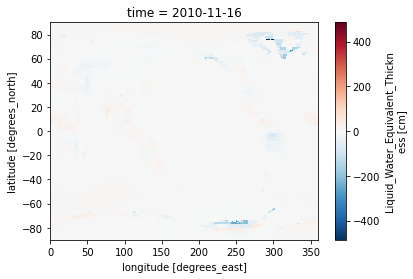

In [1]:
import xarray as xr
import urllib.request
import numpy as np
import pandas as pd
import os
from datetime import datetime
import time

# download GRACE data 
pwd = '/Users/shg096/Desktop/' # folder where downloaded SCDNA is save should be ending with '/'
fname = 'GRACE.nc'

def download_GRACE(pwd, filename):
    
    if not os.path.isdir(pwd):
        os.mkdir(pwd)
    
    # remove existing file is exists
    outfile = pwd+filename
    if os.path.isfile(outfile):
        print('It seems the file exists; perhaps perviously downloaded; will skip downloading')
    else:
        # download the file
        print('Downloading GRACE; this may take a while ...')
        print('Downloading starts at: ', datetime.now())
        url = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/tellus/L3/mascon/RL06/JPL/v02/CRI/netcdf/GRCTellus.JPL.200204_202011.GLO.RL06M.MSCNv02CRI.nc?lon[0:1:719],lat[0:1:359],time[0:1:190],lwe_thickness[0:1:190][0:1:359][0:1:719],uncertainty[0:1:190][0:1:359][0:1:719],lat_bounds[0:1:359][0:1:1],lon_bounds[0:1:719][0:1:1],time_bounds[0:1:190][0:1:1]'
        urllib.request.urlretrieve(url, outfile)
        print('Downloading ends at: ', datetime.now())

# call the function
download_GRACE(pwd,fname)

# visualziation of the first time step of the result
ds = xr.open_dataset(pwd+fname)
ds_temp = ds.isel(time=100)
ds_temp.lwe_thickness.plot()


In [1]:
# loading candex
from candex.candex import candex

# initializing candex object
cndx = candex()

# specifying candex needed arguments
cndx.case_name              = 'capitals_GRACE'
cndx.temp_dir               = '../temporary/'
cndx.target_shp             = '../data/target_shapefiles/Capitals_point.shp' # all the world capitals as point
cndx.source_nc              = '/Users/shg096/Desktop/GRACE.nc' # GRACE dataset
cndx.var_names              = ['lwe_thickness']
cndx.var_lon                = 'lon' 
cndx.var_lat                = 'lat'
cndx.var_time               = 'time'
cndx.output_dir             = '../output/'
cndx.format_list            =  ['f4']
cndx.fill_value_list        = ['-9999.00']
#cndx.remap_csv              = '/Users/shg096/Desktop/candex_newgen/temporary/capitals_GRACE_remapping.csv'

# execute candex
cndx.run_candex()



no author name is provide and the author name is changed to (author name)!
candex detects that target shapefile is in WGS84 (epsg:4326)
candex detects that no field for ID is provided in sink/target shapefile
arbitarary values of ID are added in the field ID_t
candex detects that either of the fields for latitude or longitude is not provided in sink/target shapefile
calculating centroid of shapes in equal area projection
point shapefile for centroid of the shapes is saves here:
../temporary/capitals_GRACE_centroid.shp
candex detects that no field for latitude is provided in sink/target shapefile
latitude values are added in the field lat_t
candex detects that no field for longitude is provided in sink/target shapefile
longitude values are added in the field lon_t
candex detects point(s) as geometry of target shapefile and will apply small buffer to them
it seems everything is OK with the sink/target shapefile; added to candex object target_shp_gpd
candex will save standard shapefile fo

/Users/shg096/opt/anaconda3/lib/python3.8/site-packages/candex/candex.py:108: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2 ['lat_temp'] = shp_2.centroid.y
/Users/shg096/opt/anaconda3/lib/python3.8/site-packages/candex/candex.py:109: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2 ['lon_temp'] = shp_2.centroid.x
/Users/shg096/opt/anaconda3/lib/python3.8/site-packages/candex/candex.py:954: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  pairs = gpd.GeoDataFrame(nei, columns=['idx1','idx2'], crs=df1.crs)
/Users/shg096/opt/anaconda3/lib/python3.8/site-packages/candex/candex.py:958: FutureWarning: Assigning CRS to a Ge

------REMAPPING------
float64
Remapping /Users/shg096/Desktop/GRACE.nc to ../output/capitals_GRACE_remapped_2002-04-17-12-00-00.nc
Started at date and time 2021-03-29 17:27:08.750535
Ended   at date and time 2021-03-29 17:27:10.165904
------


35.673888617982904 51.42239817500899


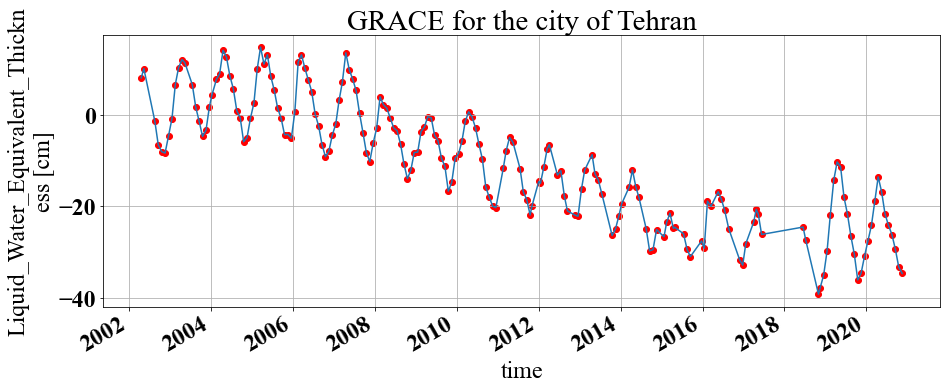

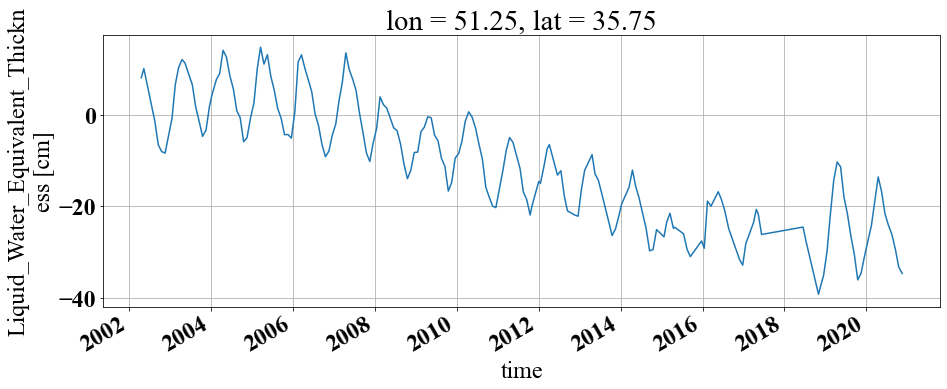

In [2]:
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)

capital_name = 'Tehran'

shp = gpd.read_file('/Users/shg096/Desktop/candex_newgen/temporary/capitals_GRACE_target_shapefile.shp')
shp = shp[shp['name']==capital_name] # get the data for given capital

# plot found values from the ID of the city
plt.figure(figsize=(15,5))
ds = xr.open_dataset('/Users/shg096/Desktop/candex_newgen/output/capitals_GRACE_remapped_2002-04-17-12-00-00.nc');
ds_slice = ds.sel(ID = shp.ID_t.iloc[0]) # slice the data for tehran
# plot the data
ds_slice.lwe_thickness.plot()
xr.plot.scatter(ds_slice, 'time', 'lwe_thickness', color='red')
plt.grid()
plt.title('GRACE for the city of '+ capital_name)
plt.savefig('../fig/Example4_A.eps')

# plot found values form the lat lon of the city from the source file
plt.figure(figsize=(15,5))
ds = xr.open_dataset('/Users/shg096/Desktop/GRACE.nc')
print(shp.lat_t.iloc[0], shp.lon_t.iloc[0])
if shp.lon_t.iloc[0] > 0:
    ds_slice = ds.sel(lat = shp.lat_t.iloc[0], lon = shp.lon_t.iloc[0]     , method ='nearest' )
else:
    ds_slice = ds.sel(lat = shp.lat_t.iloc[0], lon = shp.lon_t.iloc[0]+ 360, method ='nearest' )
ds_slice.lwe_thickness.plot()
plt.grid()

